# Exercise 4: Basic operations on images

https://docs.opencv.org/4.6.0/d3/df2/tutorial_py_basic_ops.html  
https://docs.opencv.org/4.6.0/d0/d86/tutorial_py_image_arithmetics.html

In this exercise you will learn how to:
- Access pixel values and modify them.
- Access image properties.
- Split and merge images.
- Set a Region of Interest (ROI).
- Pad images.
- Add images with [cv.add()](https://docs.opencv.org/4.6.0/d2/de8/group__core__array.html#ga10ac1bfb180e2cfda1701d06c24fdbd6) and [cv.addWeighted()](https://docs.opencv.org/4.6.0/d2/de8/group__core__array.html#gafafb2513349db3bcff51f54ee5592a19).
- Blend images.
- Mask images (bitwise operations).

Almost all the operations in this section are related to Numpy rather than OpenCV.

As a first step, let's import the python modules we need.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Accessing and modifying pixel values

Let's read in a new image and plot it.


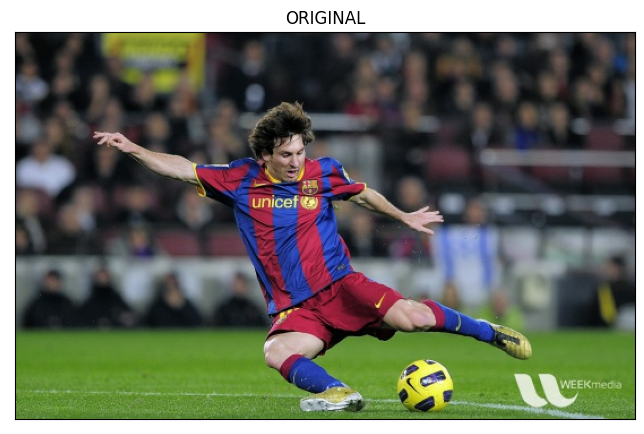

In [2]:
# Read and plot the image 'messi5.jpg'
img = cv.imread(cv.samples.findFile('../data/messi5.jpg'))

plt.figure(figsize=(8,8));
plt.imshow(img[:,:,::-1]);
plt.title('ORIGINAL'); plt.xticks([]); plt.yticks([]);

A pixel value can be accessed by its row and column coordinates \[row, column\]:
- For a BGR image, it returns an array of Blue, Green and Red values (b,g,r).
- For grayscale image, it return a scalar intensity value, e.g. 126.

You can modify the pixel values in the same way, i.e. by assigning values to a specific \[row, column\].

In [3]:
# We can access a pixel by indexing (row, column)
px = img[100,100]
print(f'\npixel b,g,r = {px}')

# We can access individual color channels (row, column, channel), where channel 0 = blue
blue = img[100,100,0]
print(f'pixel b (blue) channel = {blue}')

# We can also modify a pixel e.g. write a new b,g,r value (255,255,255) to pixel (100,100)
img[100,100] = [255,255,255]
print(f'pixel b,g,r = {img[100,100]}')


pixel b,g,r = [157 166 200]
pixel b (blue) channel = 157
pixel b,g,r = [255 255 255]


## Accessing image properties

Image properties include:
- The number of rows, columns, and channels, i.e. the shape of the image `img.shape` = (rows, columns, channels).
- The total number of pixels (across all color channels), i.e. `img.size`.
- The datatype of the image (pixels), i.e. `img.dtype`.

In [4]:
# Let's print some image properties
print(f'Image shape (height, width, color channels) = {img.shape}')
print(f'Image size (number of pixels, including each color channel) = {img.size}')
print(f'Image (pixel) data type = {img.dtype}')

Image shape (height, width, color channels) = (342, 548, 3)
Image size (number of pixels, including each color channel) = 562248
Image (pixel) data type = uint8


## Splitting and merging image channels

Sometimes you will need to work separately on the B,G,R channels of an image. In this case, you need to split the BGR image into single channels. In other cases, you may need to join these individual channels to create a BGR image.

Splitting and merging image channels can be done with:
- OpenCV's functions `cv.split()` and `cv.merge()` respectively.
- Numpy slicing.


b.shape: (342, 548)
g.shape: (342, 548)
r.shape: (342, 548)
img.shape: (342, 548, 3)

b.shape: (342, 548)


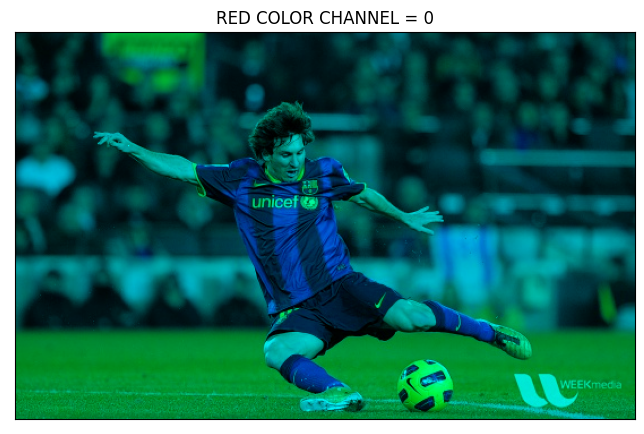

In [5]:
# We can split and merge color channels
b,g,r = cv.split(img)
img = cv.merge((b,g,r))
print(f'\nb.shape: {b.shape}')
print(f'g.shape: {g.shape}')
print(f'r.shape: {r.shape}')
print(f'img.shape: {img.shape}')

# We can use indexing to e.g. get the blue color channel (for all pixels)
b = img[:,:,0]
print(f'\nb.shape: {b.shape}')

# We can also use indexing to e.g. set all pixels in the red color channel to 0
img[:,:,2] = 0

# Let's plot the image with the altered red color channel
plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1]);
plt.title('RED COLOR CHANNEL = 0'); plt.xticks([]); plt.yticks([]);


## Region Of Interest (ROI)

Sometimes, you will have to play with certain regions of images. A Region Of Interest (ROI) in an image is simply selected by using numpy slicing.

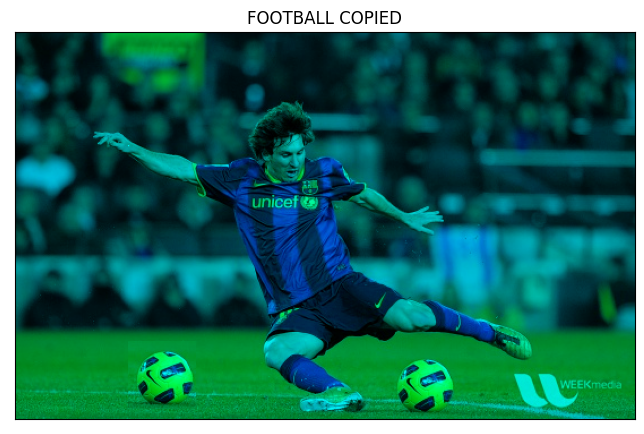

In [6]:
# Below a square Region Of Interest (ROI) is defined as rows 280 to 340, and columns 330 to 390.
# This square ROI contains the "football" in the image.
# The "football" is copied to another region in the image.
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball

# Plot the image again with the added (copied) football
plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1]);
plt.title('FOOTBALL COPIED'); plt.xticks([]); plt.yticks([]);

## Padding images

A border (padding) can be created around an image with the function `cv.copyMakeBorder()`. Padding is important in e.g. convolution operations. The function takes following arguments:
- src: input image
- top, bottom, left, right: border width in number of pixels in corresponding directions
- borderType: flag defining what kind of border to be added:
  - `cv.BORDER_CONSTANT`: adds a constant colored border (the value given as the next argument).
  - `cv.BORDER_REFLECT`: border is a mirror reflection of the border elements, e.g. : dcba|abcde|edcb
  - `cv.BORDER_REFLECT_101` or `cv.BORDER_DEFAULT`: same as above, but with a slight change, e.g. dcb|abcde|dcb
  - `cv.BORDER_REPLICATE`: last element is replicated throughout, like this: aaaaa|abcde|eeeee
  - `cv.BORDER_WRAP`: pixels wrap around in each direction
- value: color of border if border type is cv.BORDER_CONSTANT

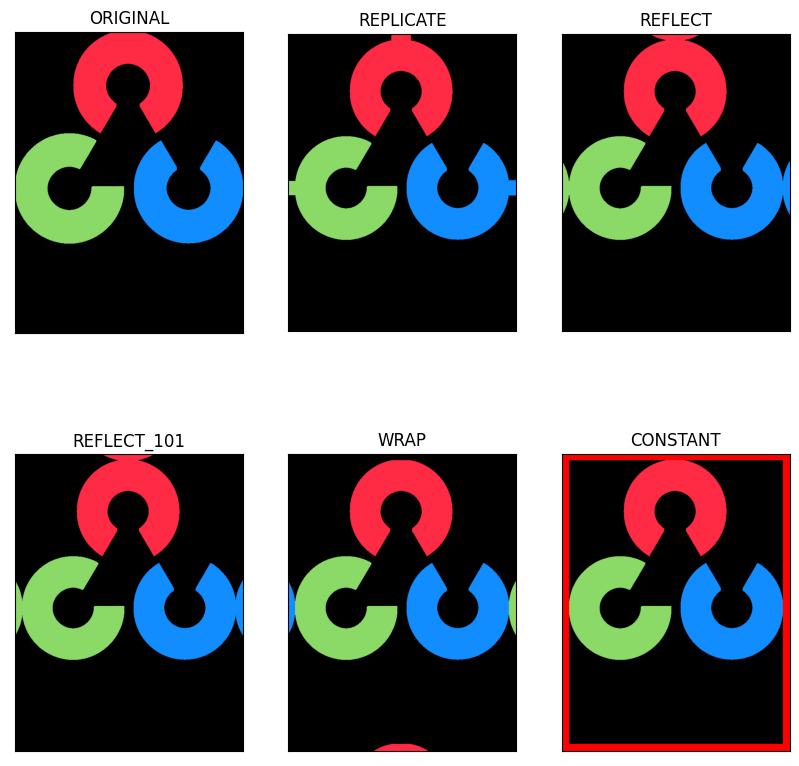

In [7]:
# Let's read in a new image (of the OpenCV logo)
img = cv.imread('../data/opencv-logo.png') 

# Let's try out the various border types.
# In all cases, the thickness of the top, bottom left and right borders are 20 pixels.
replicate = cv.copyMakeBorder(img, 20, 20, 20, 20, cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img, 20, 20, 20, 20, cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img, 20, 20, 20, 20,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img, 20, 20, 20, 20,cv.BORDER_WRAP)
constant = cv.copyMakeBorder(img, 20, 20, 20, 20, cv.BORDER_CONSTANT, value=[0,0,255]) # [0,0,255] = red border

# Let's plot the image with the various border types applied next to each other
plt.figure(figsize=(10,10))
plt.subplot(231); plt.imshow(img[:,:,::-1]); plt.title('ORIGINAL'); plt.xticks([]); plt.yticks([]);
plt.subplot(232); plt.imshow(replicate[:,:,::-1]); plt.title('REPLICATE'); plt.xticks([]); plt.yticks([]);
plt.subplot(233); plt.imshow(reflect[:,:,::-1]); plt.title('REFLECT'); plt.xticks([]); plt.yticks([]);
plt.subplot(234); plt.imshow(reflect101[:,:,::-1]); plt.title('REFLECT_101'); plt.xticks([]); plt.yticks([]);
plt.subplot(235); plt.imshow(wrap[:,:,::-1]); plt.title('WRAP'); plt.xticks([]); plt.yticks([]);
plt.subplot(236); plt.imshow(constant[:,:,::-1]); plt.title('CONSTANT'); plt.xticks([]); plt.yticks([]);
plt.show();

## Adding images

You can add two images with the OpenCV function [cv.add()](https://docs.opencv.org/4.5.1/d2/de8/group__core__array.html#ga10ac1bfb180e2cfda1701d06c24fdbd6), or simply by the numpy operation `result = img1 + img2`. Both images should be of the same depth and type, or the second image can just be a scalar value.

**Note**  
There is a difference between OpenCV addition and Numpy addition. OpenCV addition is a saturated operation while Numpy addition is a modulo operation. Let's use a simple example with two numpy arrays, each with one single element, below for illustrative purposes (but this will be more visible when you add two real images). Stick with OpenCV functions, because they will provide a better result.

In [8]:
# Create two 1x1 grayscale images
img1 = np.uint8([250])
img2 = np.uint8([10])

# Add the images using OpenCV's cv.add() function
# 250 + 10 = 260 => 255
# OpenCV simply truncates the 8-bit value between 0-255
print(f'cv.add(img1,img2) = {cv.add(img1,img2)}') 

# Add the images using Numpy addition
# 250 + 10 = 260 % 256 = 4
# This is the result of an overflow of an 8-bit int ("restarts" at 0 when the sum hits 255)
print(f'      img1 + img2 = {img1+img2}')         

cv.add(img1,img2) = [[255]]
      img1 + img2 = [4]


## Blending images

Blending images is also image addition, but different weights are given to the two images, in order to give a feeling of blending or transparency. Two images $I_1$ and $I_2$ are added as per the equation below:

$$
I_{result}(x,y) = (1−\alpha) \cdot I_1(x,y) + \alpha \cdot I_2(x,y)
$$

By varying α from $0 \rightarrow 1$, you can perform a cool transition between one image to another.

The OpenCV function [cv.addWeighted()](https://docs.opencv.org/4.5.1/d2/de8/group__core__array.html#gafafb2513349db3bcff51f54ee5592a19) applies the following equation to two images, where $\gamma$ is a scalar that can be used as an offset:

$$
I_{result}(x,y) = (1−\alpha) \cdot I_1(x,y) + \alpha \cdot I_2(x,y) + \gamma
$$

Let's look at an example where we blend the first image (weight of $0.7$) with the second image (weight of $0.3$), where $\gamma = 0$.

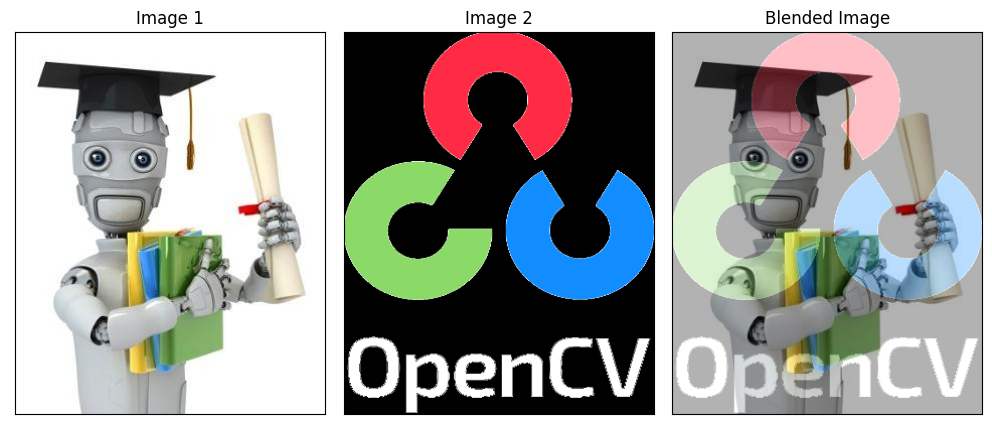

In [9]:
# Read in two images
img1 = cv.imread('../data/ml.png')
img2 = cv.imread('../data/opencv-logo-black_small.png')

# Blend the two images (0.7 * img1 + 0.3 * img2)
img_blended = cv.addWeighted(img1, 0.7, img2, 0.3, 0)

# Plot the two images together with the blended image
plt.figure(figsize=(10,10))
plt.subplot(131), plt.imshow(img1[:,:,::-1]), plt.xticks([]), plt.yticks([]), plt.title('Image 1')
plt.subplot(132), plt.imshow(img2[:,:,::-1]), plt.xticks([]), plt.yticks([]), plt.title('Image 2')
plt.subplot(133), plt.imshow(img_blended[:,:,::-1]), plt.xticks([]), plt.yticks([]), plt.title('Blended Image')
plt.tight_layout(pad=1.0)
plt.show()

## Bitwise operations (masking)

The bitwise operations include bitwise AND, OR, NOT, and XOR. They are highly useful when extracting any part of an image, defining and working with non-rectangular ROI's, etc. In OpenCV the functions are called `cv.bitwise_and()`, `cv.bitwise_or()`, `cv.bitwise_not()` and `cv.bitwise_xor()`.

Let's look at an example where we want to add the OpenCV logo to an existing image (of messi).

We can't just add the two images, since it will change the color of the resulting image. Neither can we just blend the two images, since the resulting image will be transparent (and we want the logo and the original pixels to remain opaque in the resulting image).

If the OpenCV logo was a rectangular region, we could use a ROI to solve the problem, but the OpenCV logo is a not a rectangular shape.

We can solve the problem using bitwise operations, as shown in the code below.

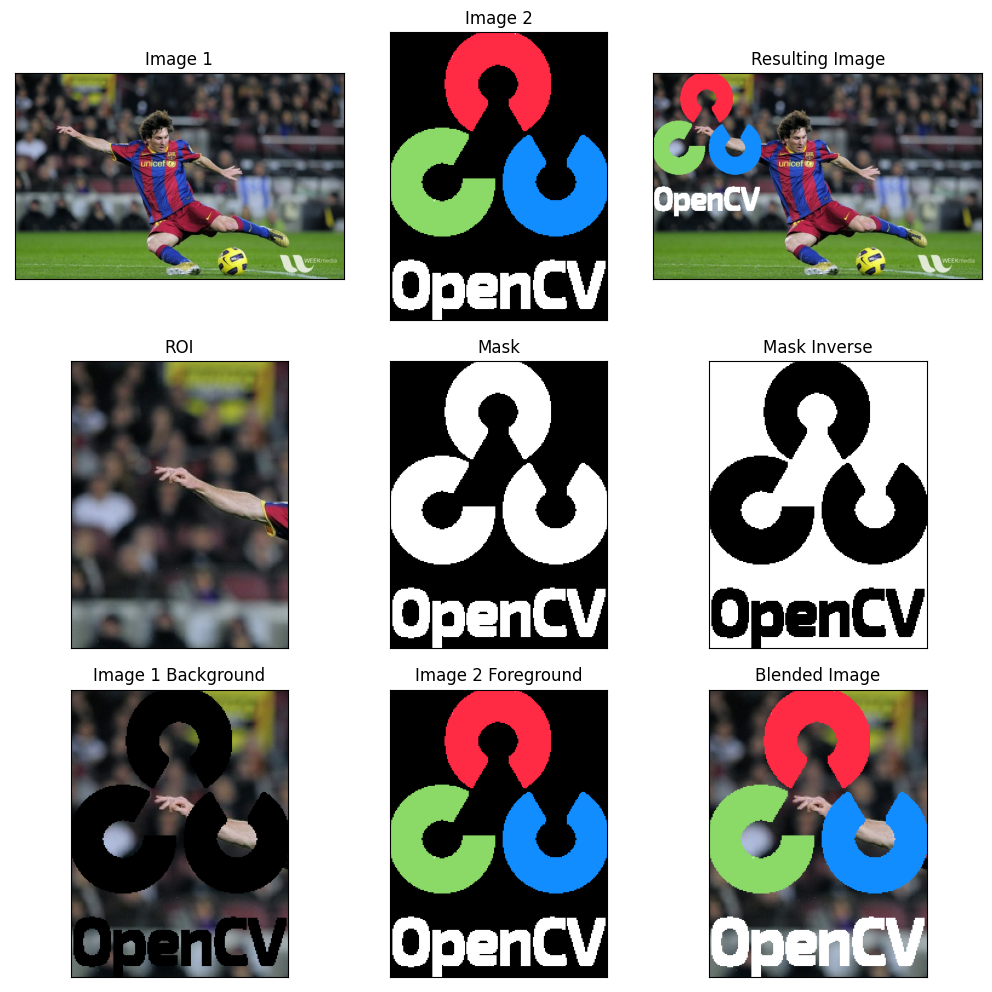

In [10]:
# Load two images
img1 = cv.imread('../data/messi5.jpg')
img2 = cv.imread('../data/opencv-logo-white.png')

# I want to put logo on top-left corner, So I create a ROI
rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols]

# Now create a mask of logo and create its inverse mask also
img2_gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2_gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi, roi, mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2, img2, mask = mask)

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg, img2_fg)
img_result = img1.copy()
img_result[0:rows, 0:cols] = dst

# Plot the two images together with the resulting image
plt.figure(figsize=(10,10))
plt.subplot(331), plt.imshow(img1[:,:,::-1]), plt.xticks([]), plt.yticks([]), plt.title('Image 1')
plt.subplot(332), plt.imshow(img2[:,:,::-1]), plt.xticks([]), plt.yticks([]), plt.title('Image 2')
plt.subplot(333), plt.imshow(img_result[:,:,::-1]), plt.xticks([]), plt.yticks([]), plt.title('Resulting Image')

# Plot the ROI, the mask and the inverse mask
plt.subplot(334), plt.imshow(roi[:,:,::-1]), plt.xticks([]), plt.yticks([]), plt.title('ROI')
plt.subplot(335), plt.imshow(mask, cmap="gray"), plt.xticks([]), plt.yticks([]), plt.title('Mask')
plt.subplot(336), plt.imshow(mask_inv, cmap="gray"), plt.xticks([]), plt.yticks([]), plt.title('Mask Inverse')

# Plot the result of ANDing the ROI (from the messi image) and the inverse mask (img1_bg)
plt.subplot(337), plt.imshow(img1_bg[:,:,::-1]), plt.xticks([]), plt.yticks([]), plt.title('Image 1 Background')
# Plot the result of ANDing img2 (the logo) with the mask (img2_fg)
plt.subplot(338), plt.imshow(img2_fg[:,:,::-1]), plt.xticks([]), plt.yticks([]), plt.title('Image 2 Foreground')
# Plot the result of adding img1_bg and img2_fg (i.e. the ROI with the logo in it)
plt.subplot(339), plt.imshow(dst[:,:,::-1]), plt.xticks([]), plt.yticks([]), plt.title('Blended Image')

plt.tight_layout(pad=1.0)
plt.show()